In [488]:
import pandas as pd
import numpy as np # helps to perform any scientific numeric computation
import seaborn as sns # library for statistical plotting
import matplotlib.pyplot as plt
import math
# to run this code in this jupyter notebook
%matplotlib inline 


titanic_data = pd.read_csv('C:\\Users\\charles\\Desktop\\Jupiter\\edureka\\LogisticRegresion\\Titanic-Data.csv') 
titanic_data.head(10)

no_passengers = len(titanic_data.index) # calculating the tottal number of passengers
print(f"# of Passenger {no_passengers}")
titanic_data

# of Passenger 891


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Analyzing the data

<AxesSubplot:xlabel='Survived', ylabel='count'>

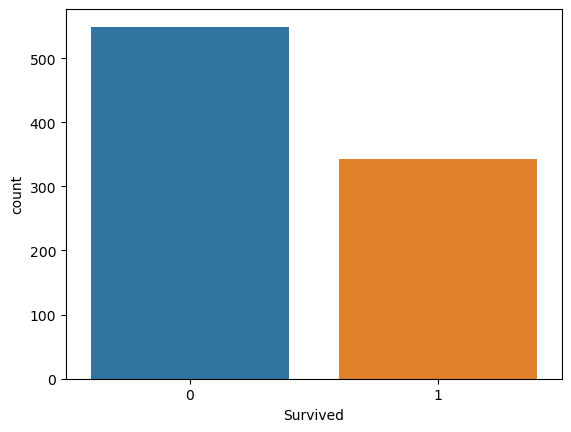

In [489]:
# checking the people who survived
sns.countplot(x='Survived', data=titanic_data)

<AxesSubplot:xlabel='Survived', ylabel='count'>

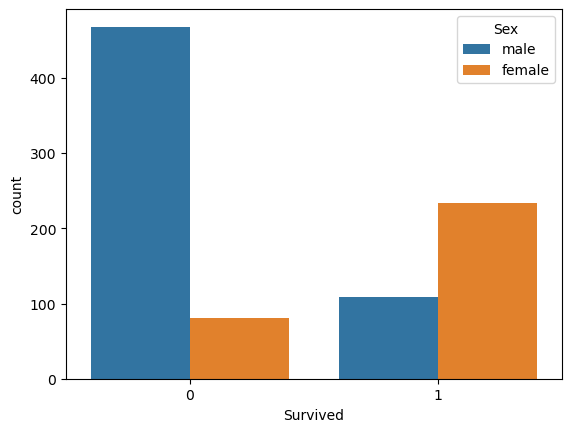

In [490]:
# evaluating how many males and females survived
sns.countplot(x='Survived', hue='Sex', data=titanic_data)


<AxesSubplot:xlabel='Survived', ylabel='count'>

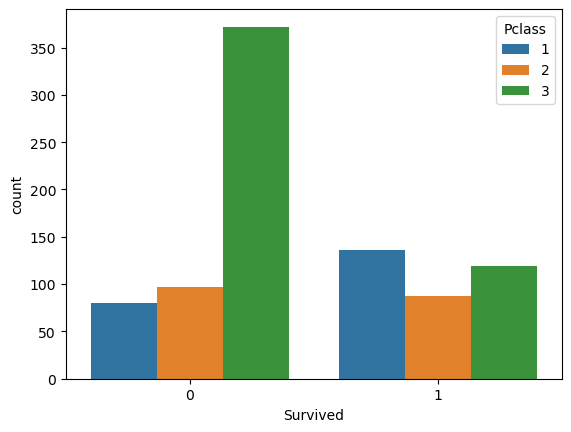

In [491]:
# checking the passengers who survived were in which class, the hue will be "Pclass"
sns.countplot(x='Survived', hue='Pclass', data=titanic_data)


<AxesSubplot:title={'center':'Age'}, xlabel='age', ylabel='Frequency'>

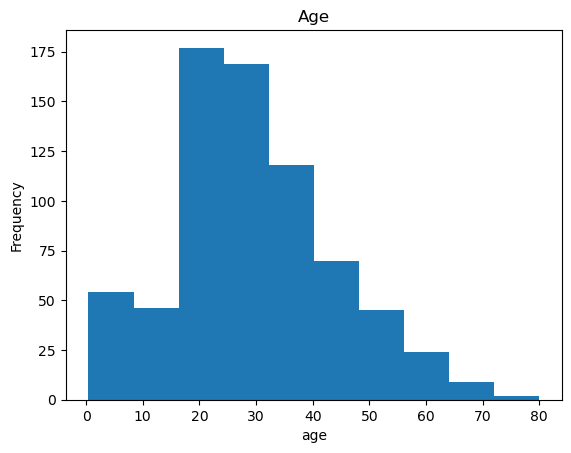

In [492]:
# plotting a histogram of age distribution
plt.title("Age")
plt.xlabel('age')
titanic_data['Age'].plot.hist()


<AxesSubplot:title={'center':'Fare graph'}, xlabel='fare', ylabel='Frequency'>

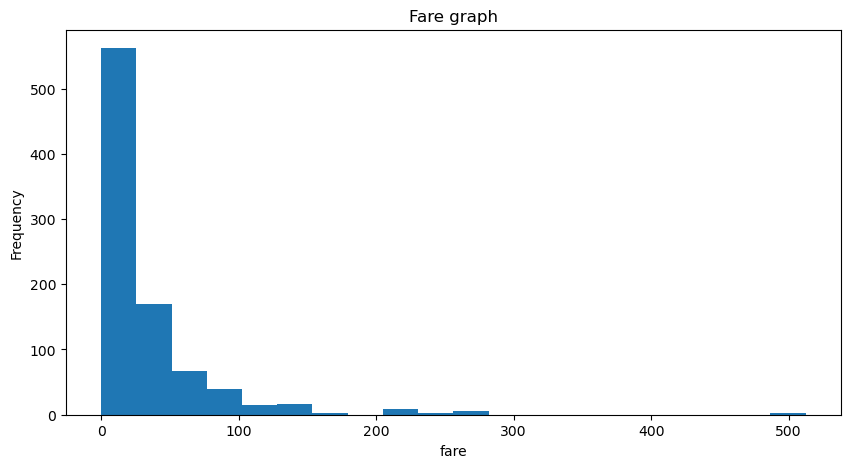

In [493]:
# plotting a graph of fare
plt.title("Fare graph")
plt.xlabel("fare")
titanic_data['Fare'].plot.hist(bins=20, figsize=(10,5))

In [494]:
# getting all the info
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:title={'center':'sibling and spouse'}, xlabel='SibSp', ylabel='count'>

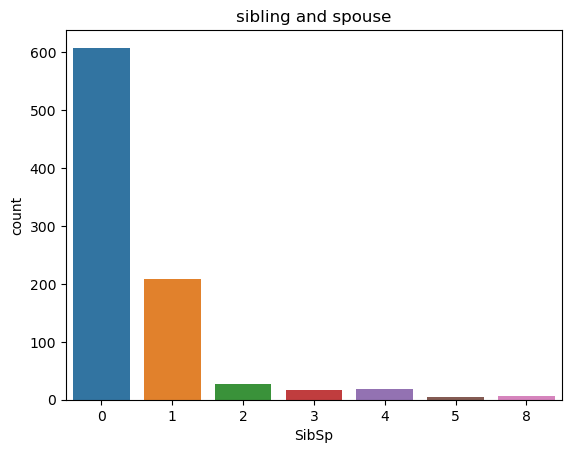

In [495]:
# info about the SibSp (siblin and the spouse)
plt.title("sibling and spouse")
sns.countplot(x='SibSp', data=titanic_data)

<AxesSubplot:title={'center':'parent child graph'}, xlabel='Parch', ylabel='count'>

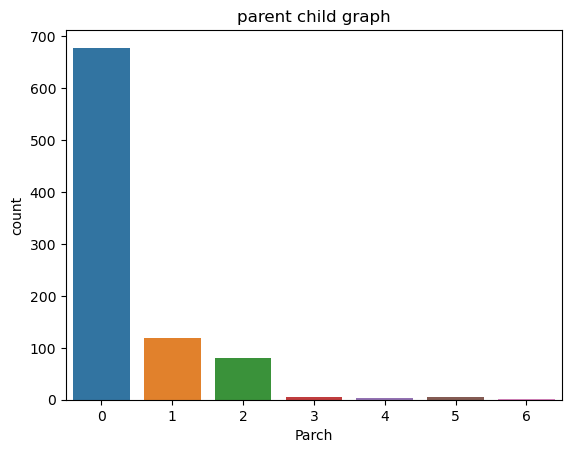

In [496]:
# parent and the child
plt.title("parent child graph")
sns.countplot(x='Parch', data=titanic_data)

## Data Wrangling
-it is cleaning the data, to remove unnecessary data

In [497]:
titanic_data.isnull() # it returns a boolean variable

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [498]:
# checking the columns that have null in the columns and adding them up
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

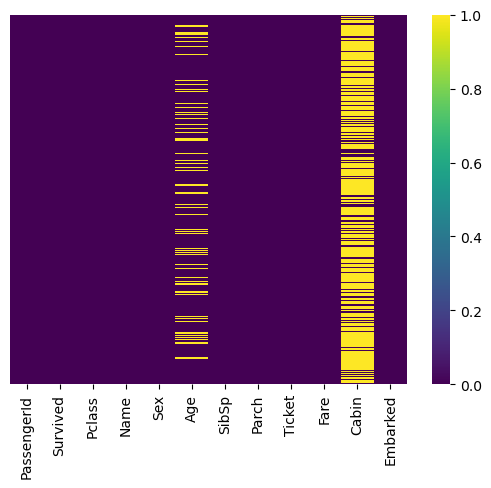

In [499]:
sns.heatmap(titanic_data.isnull(), yticklabels=False, cmap='viridis')

<AxesSubplot:title={'center':'Age and the class graph'}, xlabel='Pclass', ylabel='Age'>

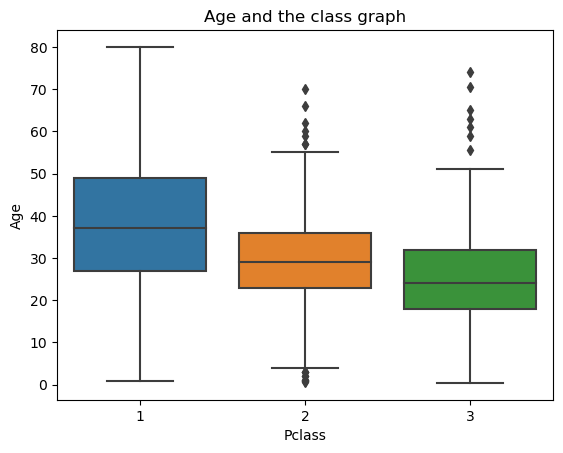

In [500]:
# using boxplot
plt.title("Age and the class graph")
sns.boxplot(x='Pclass', y='Age', data=titanic_data)

In [501]:
# droping the column that has Null values
titanic_data.drop("Cabin", axis=1, inplace=True)

In [502]:
titanic_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [503]:
titanic_data.dropna(inplace=True)

<AxesSubplot:>

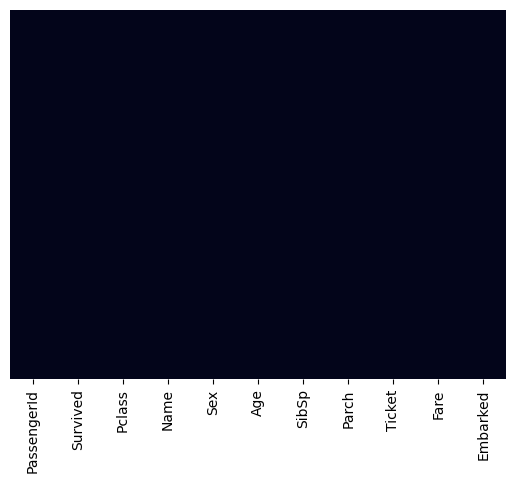

In [504]:
sns.heatmap(titanic_data.isnull(), yticklabels=False, cbar=False)

In [505]:
# calculating the sum of the null dataset
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [506]:
# the strings have to be converted into numerical values which are dummy values
sex = pd.get_dummies(titanic_data['Sex'], drop_first=True)
sex.head(5)


,male
0,1
1,0
2,0
3,0
4,1


In [507]:
# converting emback columns to dummy values
embark = pd.get_dummies(titanic_data['Embarked'], drop_first=True)
embark.head(5)

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [508]:
# concatenating the columns 
titanic_data = pd.concat([titanic_data, sex, embark], axis=1)

In [509]:
titanic_data.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,1,0,1


In [510]:
# dropping all the irrelevant column 
titanic_data.drop(['PassengerId', 'Name', 'Sex', 'Ticket', 'Embarked'], axis=1, inplace=True)

In [511]:
titanic_data.head(5)

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [512]:
titanic_data.head(5)

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


### Train Data, Test Data

In [513]:
X = titanic_data.drop('Survived', axis=1)
y = titanic_data['Survived']

print(X)


     Pclass   Age  SibSp  Parch     Fare  male  Q  S
0         3  22.0      1      0   7.2500     1  0  1
1         1  38.0      1      0  71.2833     0  0  0
2         3  26.0      0      0   7.9250     0  0  1
3         1  35.0      1      0  53.1000     0  0  1
4         3  35.0      0      0   8.0500     1  0  1
..      ...   ...    ...    ...      ...   ... .. ..
885       3  39.0      0      5  29.1250     0  1  0
886       2  27.0      0      0  13.0000     1  0  1
887       1  19.0      0      0  30.0000     0  0  1
889       1  26.0      0      0  30.0000     1  0  0
890       3  32.0      0      0   7.7500     1  1  0

[712 rows x 8 columns]


In [514]:
# splitting the data into both the testing and the training data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1)

In [515]:
# scaling is important to make sure that the independent variables dont other varibales
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### creating the model

In [516]:
from sklearn.linear_model import LogisticRegression

In [517]:
# creating an instance of this model
logmodel = LogisticRegression(max_iter=1000)

In [518]:
# fitting this model the data
logmodel.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [519]:
# predicting 
predictions = logmodel.predict(X_test)

In [520]:
# evaluating how a model has been performing
from sklearn.metrics import classification_report
classification_report(y_test, predictions)

'              precision    recall  f1-score   support\n\n           0       0.82      0.81      0.81       126\n           1       0.73      0.74      0.73        88\n\n    accuracy                           0.78       214\n   macro avg       0.77      0.77      0.77       214\nweighted avg       0.78      0.78      0.78       214\n'

In [521]:
# evaluation can also be done using the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[102,  24],
       [ 23,  65]], dtype=int64)

In [546]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.780373831775701

### saving the model into a file

In [550]:
import joblib
joblib.dump(logmodel, 'titanic_model')

['titanic_model']

In [553]:
titanic_model = joblib.load('titanic_model')

In [556]:
# predicting using the loaded model
sample_1 = [[2, 45, 0, 3, 120.67, 0, 0, 1]]
sample_1 = scaler.transform(sample_1)
prediction = titanic_model.predict(sample_1)
if prediction == 0:
    print(f"{prediction} they died")
else:
    print(f"{prediction}: they survived")

[1]: they survived


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


### making predictions

In [547]:
#            Pclass   Age        SibSp  Parch   Fare       male  Q   S
new_sample = [[1     , 32.0   ,    1,     0,      200.87,   0,   1,   0]]
new_sample = scaler.transform(new_sample)
prediction = logmodel.predict(new_sample)
if prediction == 0:
    print("The person died")
    print("Prediction:", prediction)
else:
    print("This person survived")

This person survived


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


### saving the scaler

In [557]:
joblib.dump(scaler, 'titanic_scaler.pkl')

['titanic_scaler.pkl']